In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading in Data

In [2]:
#import relevant imdb databases

imdb_names = pd.read_csv('name.basics.tsv.gz', sep='\t')
imdb_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', low_memory=False)
imdb_principals = pd.read_csv('title.principals.tsv.gz', sep='\t', low_memory=False)
#title_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', low_memory=False)

In [3]:
tmdb_movies = pd.read_csv('tmdb_movies_data.csv')

tmdb_movies = tmdb_movies.drop(['id', 'homepage', 'tagline', 'overview'], axis=1)
tmdb_movies = tmdb_movies[(tmdb_movies['budget'] != 0)]

In [4]:
actors = imdb_principals.loc[(imdb_principals['category'].isin(['actress', 'actor']) &
                              (imdb_principals['tconst'].isin(imdb_basics.loc[imdb_basics['titleType'] == 'movie']['tconst'])))]
actors = actors[['tconst', 'nconst']]
actors = actors.merge(imdb_names[['nconst', 'primaryName']], on='nconst')
actors = actors.join(imdb_basics.loc[imdb_basics['startYear'] != '\\N']['startYear'], how='inner')

In [5]:
tmdb_movies = tmdb_movies.merge(actors.groupby('tconst').agg(list)['primaryName'], left_on='imdb_id', right_index=True)

In [6]:
def actor_ytd(id):
    cast = tmdb_movies.loc[tmdb_movies['imdb_id'] == id]['primaryName'].iloc[0]
    release = tmdb_movies.loc[tmdb_movies['imdb_id'] == id]['release_year'].iloc[0]

    short_actors = actors.loc[(actors['primaryName'].isin(cast))]
    df = short_actors.loc[short_actors['startYear'].astype(int) < release]
    return len(df)

#### Warning: Code might take 5-10 minutes to run

In this cell we are counting the total number of movies the entire cast has been in prior to the release year of the movie.

In [7]:
tmdb_movies['actor_sum'] = tmdb_movies['imdb_id'].apply(actor_ytd)
tmdb_movies

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primaryName,actor_sum
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Judy Greer, Chris Pratt, Bryce Dallas Howard,...",71
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Charlize Theron, Nicholas Hoult, Tom Hardy]",91
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Kate Winslet, Shailene Woodley, Theo James]",73
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Oscar Isaac, Domhnall Gleeson, Daisy Ridley, ...",57
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Paul Walker, Jason Statham, Vin Diesel, Dwayn...",140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/1966,28,7.0,1966,8.061618e+07,1.343603e+08,"[Richard Attenborough, Richard Crenna, Steve M...",51
10841,tt0062262,0.264925,75000,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,Monte Hellman,horseback riding|revenge|pursuit|desert|whistling,82,Western,Proteus Films,10/23/1966,12,5.5,1966,5.038511e+05,0.000000e+00,"[Jack Nicholson, Millie Perkins, Warren Oates,...",35
10848,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/1966,42,6.7,1966,3.436265e+07,8.061618e+07,"[Edmond O'Brien, Stephen Boyd, Donald Pleasenc...",72
10855,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/1966,14,6.1,1966,4.702610e+06,0.000000e+00,"[Liam Redmond, Dick Sargent, Joan Staley, Don ...",6


## EDA






In [8]:
tmdb_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor_sum
count,4924.000000,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4924.000000
mean,1.021182,3.185490e+07,8.413256e+07,107.580422,426.134647,6.047725,2001.014013,3.826619e+07,1.070997e+08,75.444354
std,1.353240,3.939204e+07,1.624221e+08,19.327770,803.506110,0.857219,11.882132,4.237083e+07,1.994349e+08,53.623930
min,0.001117,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00,0.000000
25%,0.361762,6.500000e+06,2.050360e+05,94.000000,39.000000,5.500000,1995.000000,9.199996e+06,2.352932e+05,34.000000
50%,0.645250,1.900000e+07,2.467834e+07,104.000000,133.000000,6.100000,2004.000000,2.423495e+07,3.315504e+07,68.000000
75%,1.191162,4.000000e+07,9.549851e+07,117.000000,427.250000,6.600000,2010.000000,5.184889e+07,1.205059e+08,108.000000
max,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,661.000000


In [9]:
tmdb_movies = tmdb_movies.assign(profit=tmdb_movies["revenue"] - tmdb_movies["budget"])
tmdb_movies = tmdb_movies.assign(adj_profit=tmdb_movies["revenue_adj"] - tmdb_movies["budget_adj"])

In [10]:
#average profit for all of the films in our dataset

average_profit = tmdb_movies["profit"].mean()
average_profit

52277658.770511776

Finding how many different genres there are in our dataset

In [11]:
#finding how many unique genres there are

tmdb_movies['genres'] = tmdb_movies['genres'].str.split('|')
df_exploded = tmdb_movies.explode('genres')
unique_genres = df_exploded['genres'].unique()

### Visualizing how movie genres play a role in our data.

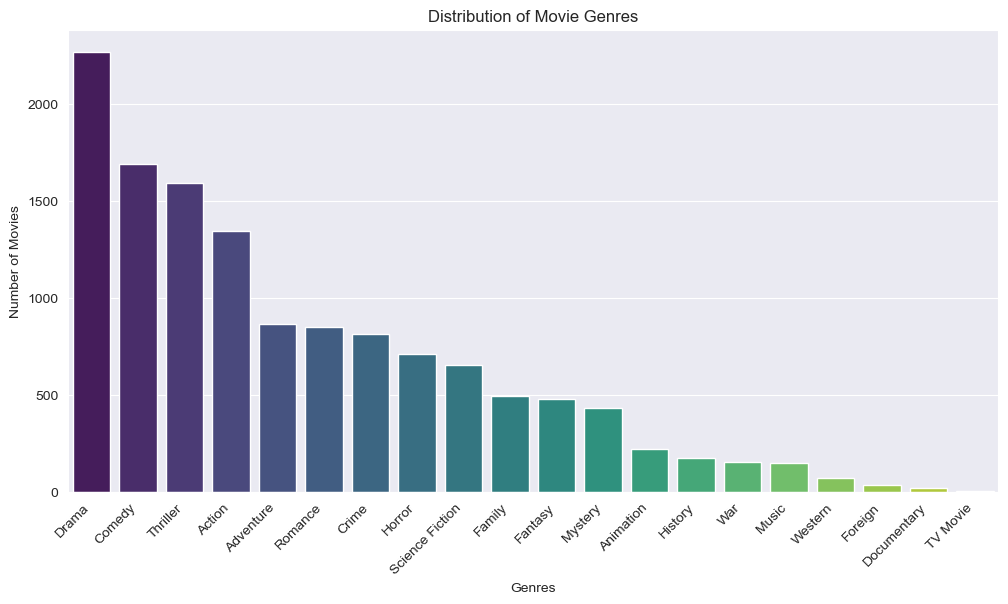

In [12]:
# Create a bar plot to visualize the distribution of genres
genre_counts = tmdb_movies['genres'].explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

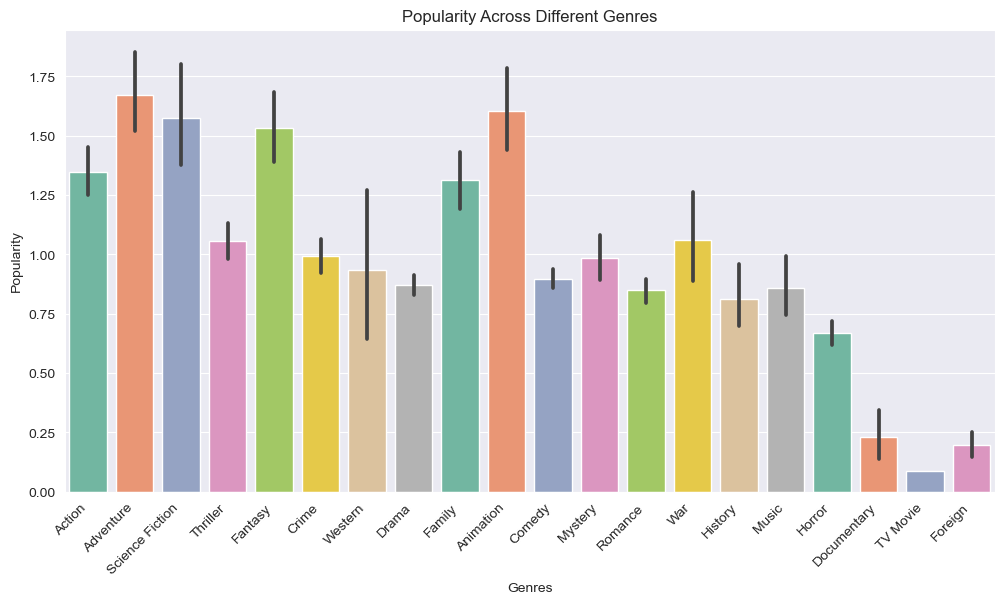

In [13]:
# Analyze how popularity varies across different genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='popularity', data=tmdb_movies.explode("genres"), palette='Set2')
plt.title('Popularity Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

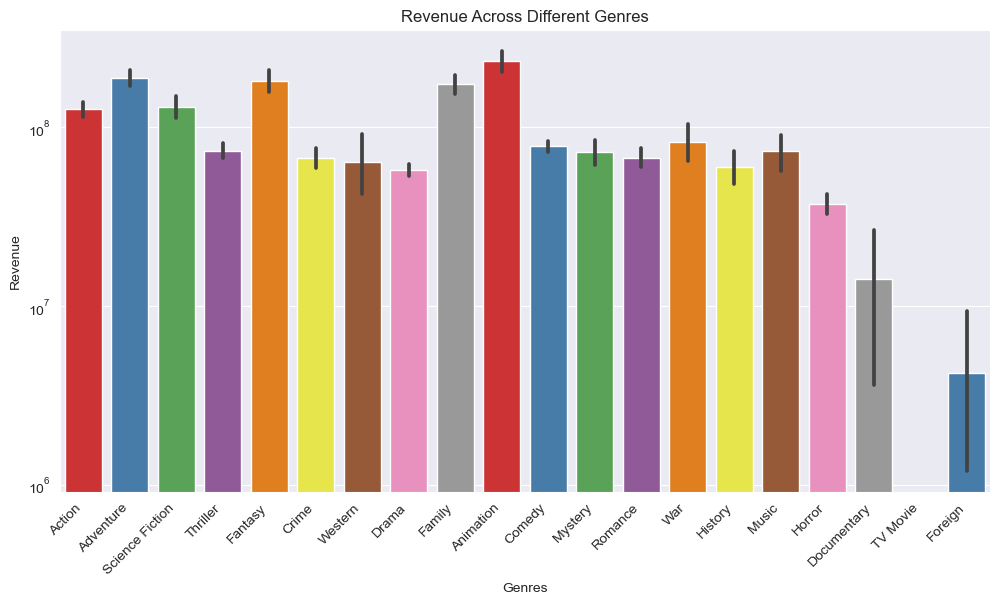

In [14]:
# Analyze how revenue varies across different genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='revenue', data=tmdb_movies.explode('genres'), palette='Set1')
plt.title('Revenue Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

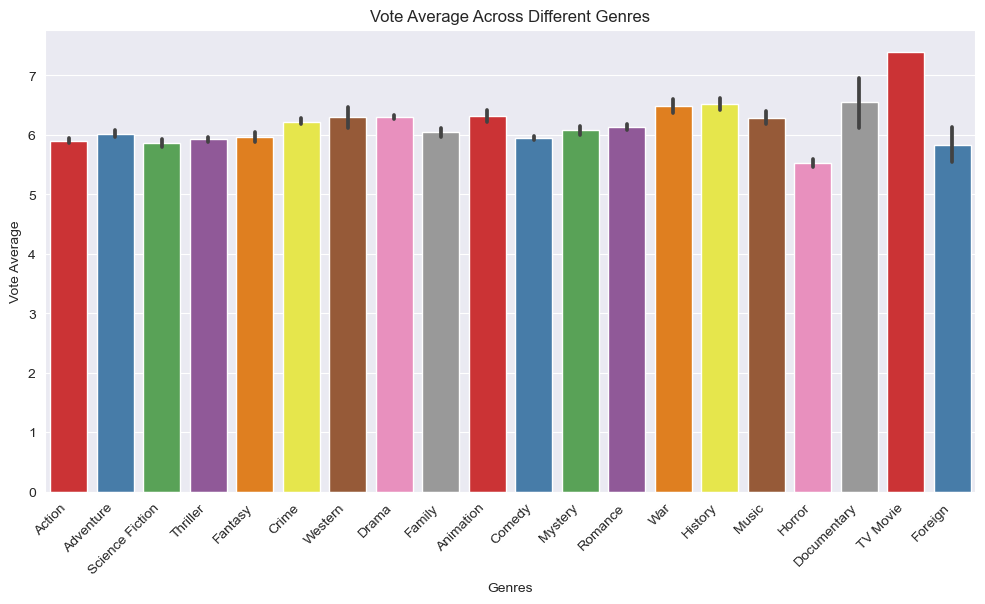

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='vote_average', data=tmdb_movies.explode('genres'), palette='Set1')
plt.title('Vote Average Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right') # Use log scale for better visualization if revenue values vary widely
plt.show()

### Visualizing effects our Actors play in the dataset

In [16]:
#finding how many unique actors there are

tmdb_movies['cast'] = tmdb_movies['cast'].str.split('|')
# Explode the lists to create multiple rows for each movie-genre pair
df_exploded = tmdb_movies.explode('cast')

In [17]:
cast_counts =  tmdb_movies['cast'].explode().value_counts()
# Get unique genres
print(cast_counts)

cast
Robert De Niro        58
Bruce Willis          57
Nicolas Cage          53
Samuel L. Jackson     53
Sylvester Stallone    39
                      ..
Dana Melanie           1
Alison Eastwood        1
Edna DorÃ©             1
Laila Morse            1
Stephanie Nielson      1
Name: count, Length: 8920, dtype: int64


In [18]:
top_50 = cast_counts[0:50]
bottom_50 = cast_counts[-50:]

In [19]:
top_50_df = tmdb_movies.explode('cast')
top_50_df = top_50_df[top_50_df['cast'].isin(cast_counts.index.to_numpy()[0:50])]
top_50_df.sort_values(by="cast")

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primaryName,actor_sum,profit,adj_profit
1954,tt1375670,1.659355,80000000,271430189,Grown Ups,Adam Sandler,Dennis Dugan,overweight|swing|foot|convertible|arrow,102,[Comedy],...,6/24/2010,1144,6.1,2010,8.000000e+07,2.714302e+08,"[Adam Sandler, Chris Rock, Salma Hayek, Kevin ...",169,191430189,1.914302e+08
81,tt2510894,2.060162,80000000,466183544,Hotel Transylvania 2,Adam Sandler,Genndy Tartakovsky,transylvania|hotel|witch|technology|magic,89,"[Animation, Comedy, Family]",...,9/21/2015,919,6.8,2015,7.359997e+07,4.288887e+08,"[Adam Sandler, Kevin James, Andy Samberg, Sele...",123,386183544,3.552887e+08
3935,tt0280590,1.525009,50000000,171269535,Mr. Deeds,Adam Sandler,Steven Brill,love letter|new hampshire|ferrari|liar|city co...,96,"[Comedy, Romance]",...,6/28/2002,379,5.7,2002,6.061307e+07,2.076234e+08,"[John Turturro, Winona Ryder, Adam Sandler, Al...",91,121269535,1.470104e+08
8521,tt0115783,0.618796,25000000,22611954,Bulletproof,Adam Sandler,Ernest R. Dickerson,undercover|friendship|police|cop|bullet wound,84,"[Action, Adventure, Comedy, Thriller]",...,9/6/1996,78,5.2,1996,3.475542e+07,3.143552e+07,"[James Caan, Adam Sandler, Damon Wayans, Jeep ...",29,-2388046,-3.319902e+06
165,tt2479478,0.913085,60000000,0,The Ridiculous 6,Adam Sandler,Frank Coraci,wild west,119,"[Comedy, Western]",...,12/11/2015,252,4.8,2015,5.519998e+07,0.000000e+00,"[Adam Sandler, Jorge Garcia, Terry Crews, Tayl...",64,-60000000,-5.519998e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,tt0116778,0.642274,27000000,25023434,Kingpin,Woody Harrelson,Bobby Farrelly|Peter Farrelly,sport|handicap|sexual favor|star spangled bann...,113,[Comedy],...,7/4/1996,126,6.4,1996,3.753585e+07,3.478800e+07,"[Randy Quaid, Bill Murray, Vanessa Angel, Wood...",85,-1976566,-2.747855e+06
1404,tt1156398,2.041804,23600000,102391382,Zombieland,Woody Harrelson,Ruben Fleischer,survival|zombies|twinkie|zombie spoof|body count,88,"[Comedy, Horror]",...,10/7/2009,2165,7.1,2009,2.398705e+07,1.040706e+08,"[Woody Harrelson, Jesse Eisenberg, Abigail Bre...",106,78791382,8.008359e+07
2577,tt0196857,0.212029,24000000,8434146,Play It to the Bone,Woody Harrelson,Ron Shelton,sport,124,"[Comedy, Drama]",...,12/25/1999,20,5.3,1999,3.141727e+07,1.104074e+07,"[Antonio Banderas, Lolita Davidovich, Woody Ha...",115,-15565854,-2.037653e+07
7391,tt0477348,2.730114,25000000,171600000,No Country for Old Men,Woody Harrelson,Joel Coen|Ethan Coen,texas|drug traffic|hitman|united statesâ€“mexi...,122,"[Crime, Drama, Thriller]",...,11/8/2007,1706,7.6,2007,2.629171e+07,1.804663e+08,"[Tommy Lee Jones, Josh Brolin, Woody Harrelson...",190,146600000,1.541746e+08


#### Checking to see how our top actors in our Dataset perform in terms of profit.

We took the top 50 actors and bottom 50 actors in terms of the movies they were in

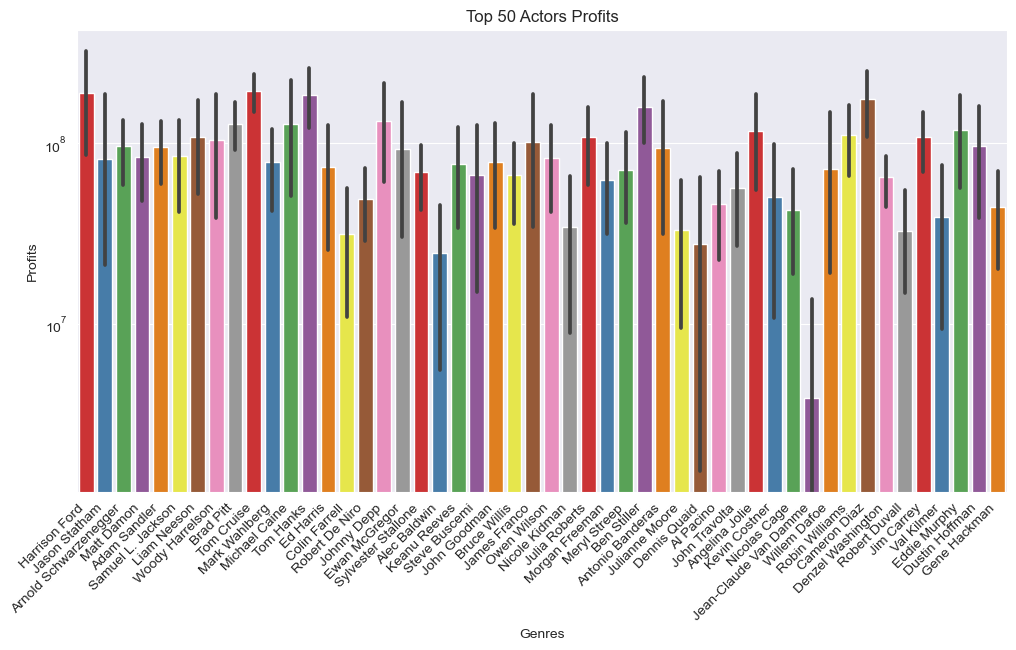

In [20]:
# Analyze how revenue varies across top_50 actors
plt.figure(figsize=(12, 6))
sns.barplot(x='cast', y='profit', data=top_50_df, palette='Set1')
plt.title('Top 50 Actors Profits')
plt.xlabel('Genres')
plt.ylabel('Profits')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

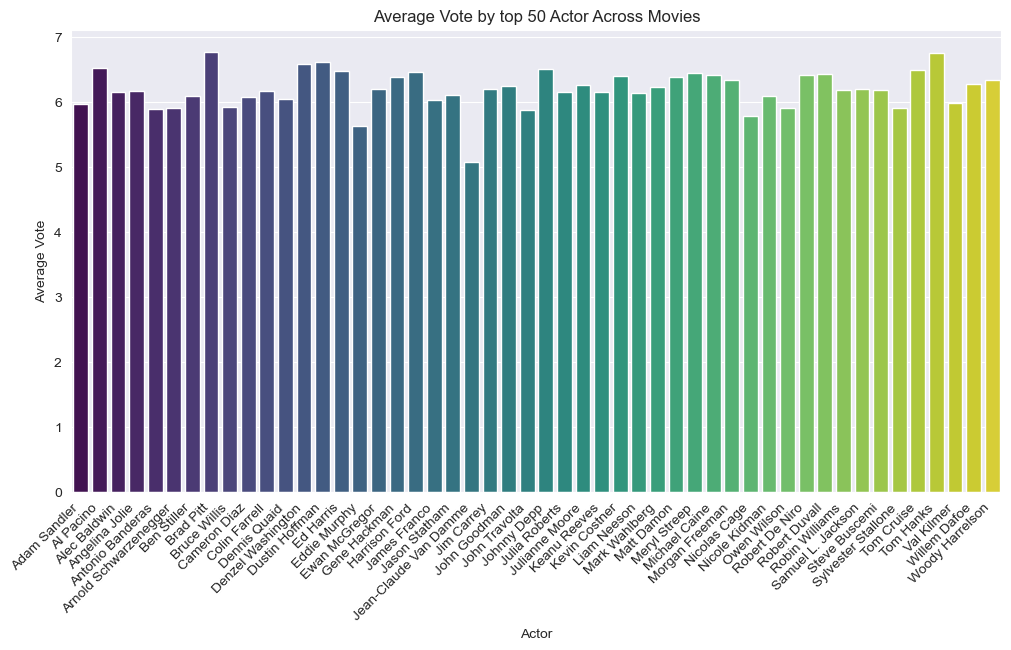

In [21]:
average_vote_by_actor = top_50_df.groupby('cast')['vote_average'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='cast', y='vote_average', data=average_vote_by_actor, palette='viridis')
plt.title('Average Vote by top 50 Actor Across Movies')
plt.xlabel('Actor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Vote')
plt.show()

In [22]:
bottom_50_df = tmdb_movies.explode('cast')
bottom_50_df = bottom_50_df[bottom_50_df['cast'].isin(cast_counts.index.to_numpy()[-50:])]
bottom_50_df = bottom_50_df.sort_values(by="cast")

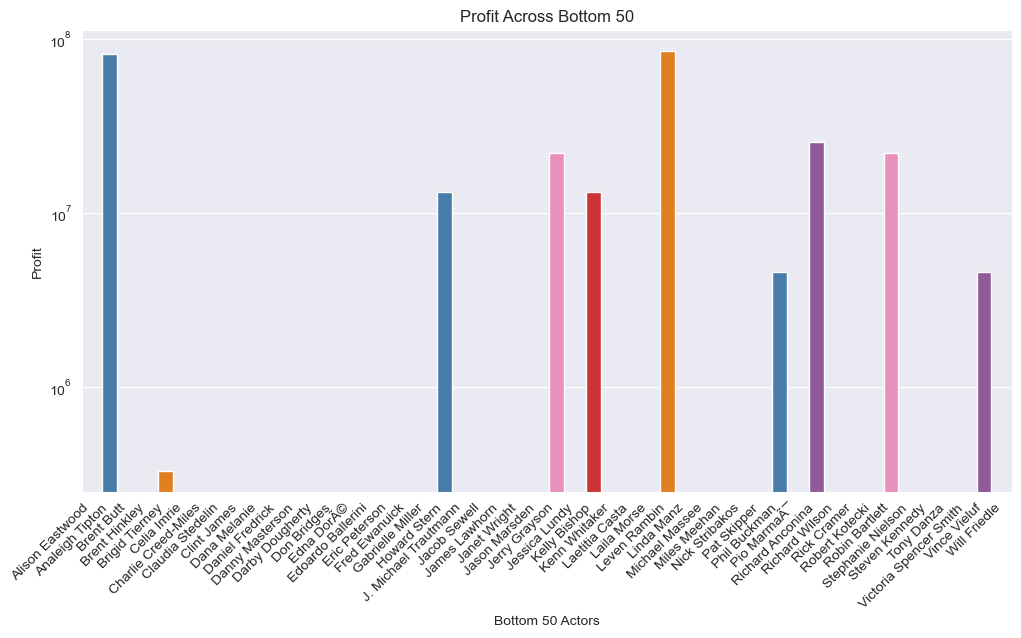

In [23]:
# Analyze how revenue varies across bottom_50 actors.
# These actors might be minor and play less prominent roles in popular movies.
plt.figure(figsize=(12, 6))
sns.barplot(x='cast', y='profit', data=bottom_50_df, palette='Set1')
plt.title('Profit Across Bottom 50')
plt.xlabel('Bottom 50 Actors')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

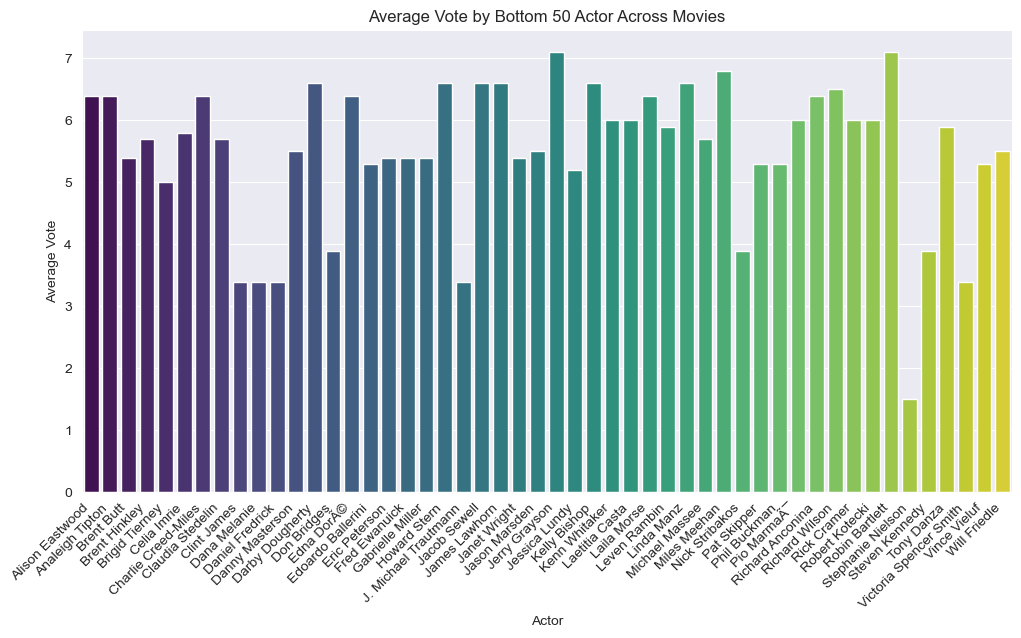

In [24]:
average_vote_by_actor = bottom_50_df.groupby('cast')['vote_average'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='cast', y='vote_average', data=average_vote_by_actor, palette='viridis')
plt.title('Average Vote by Bottom 50 Actor Across Movies')
plt.xlabel('Actor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Vote')
plt.show()

### Visualizing effects our Directors play in the dataset


In [25]:
#finding how many unique actors there are

# Explode the lists to create multiple rows for each movie-genre pair
director_counts =  tmdb_movies['director'].explode().value_counts()

In [26]:
top_directors = director_counts[0:50]
bottom_directors = director_counts[-50:]

In [27]:
top_director_df = tmdb_movies.explode('director')
top_director_df = top_director_df[top_director_df['director'].isin(director_counts.index.to_numpy()[0:50])]
top_director_df = top_director_df.sort_values(by="director")

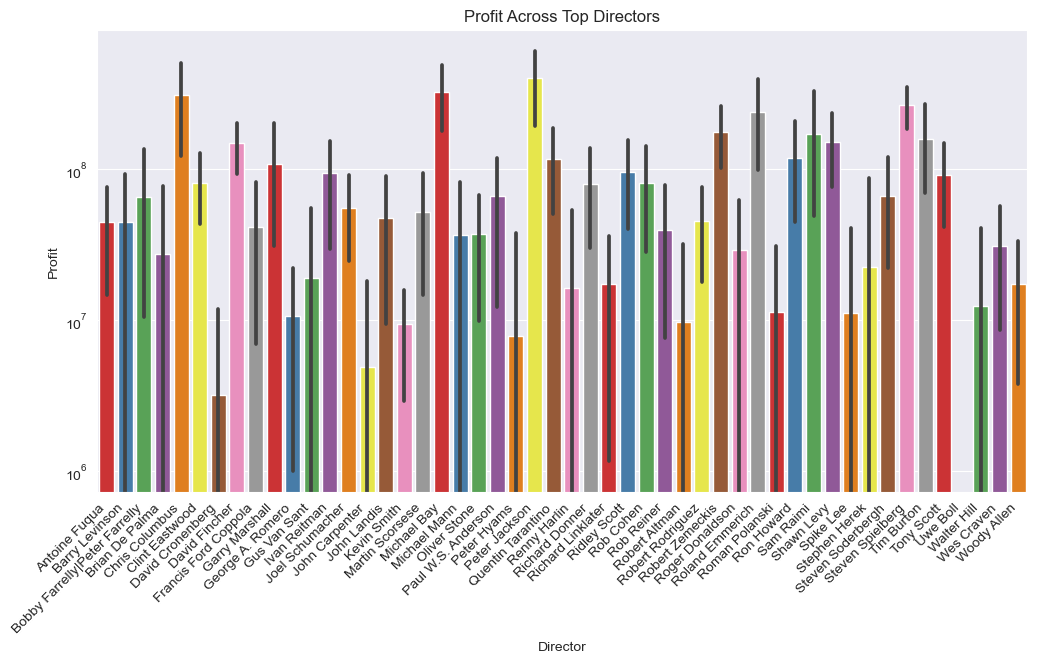

In [28]:
# Analyze how revenue varies across top_50 directors
plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='profit', data=top_director_df, palette='Set1')
plt.title('Profit Across Top Directors')
plt.xlabel('Director')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

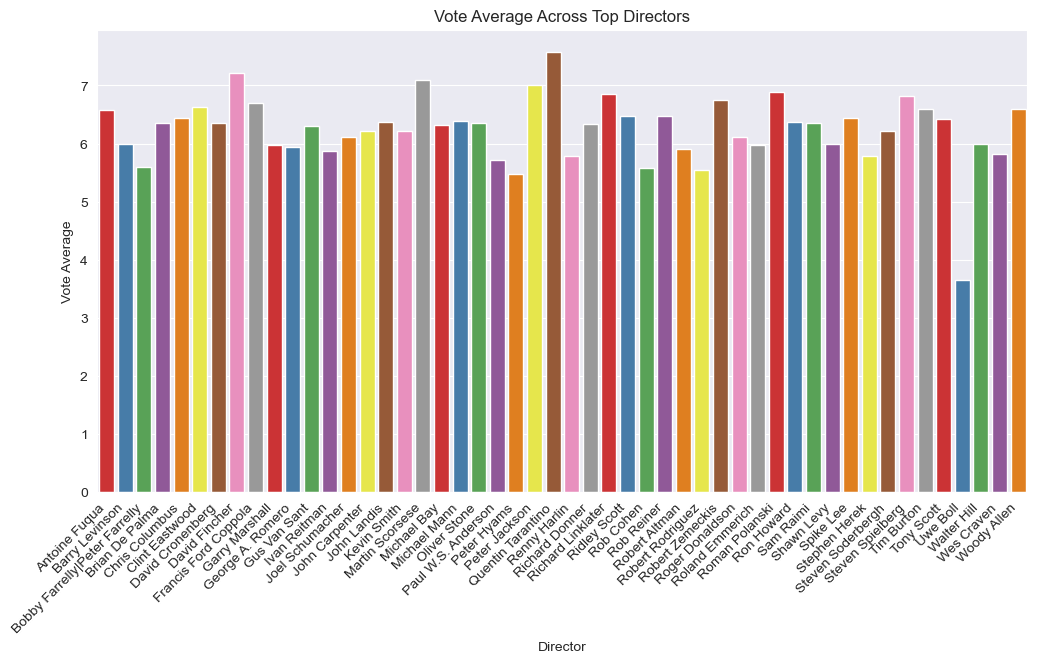

In [29]:
# Analyze how vote average varies across directors on top of the list
average_vote_by_director = top_director_df.groupby('director')['vote_average'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='vote_average', data=average_vote_by_director, palette='Set1')
plt.title('Vote Average Across Top Directors')
plt.xlabel('Director')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
bottom_director_df = tmdb_movies.explode('director')
bottom_director_df = bottom_director_df[bottom_director_df['director'].isin(director_counts.index.to_numpy()[-50:])]
bottom_director_df = bottom_director_df.sort_values(by="director")

C:\Users\wenbi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


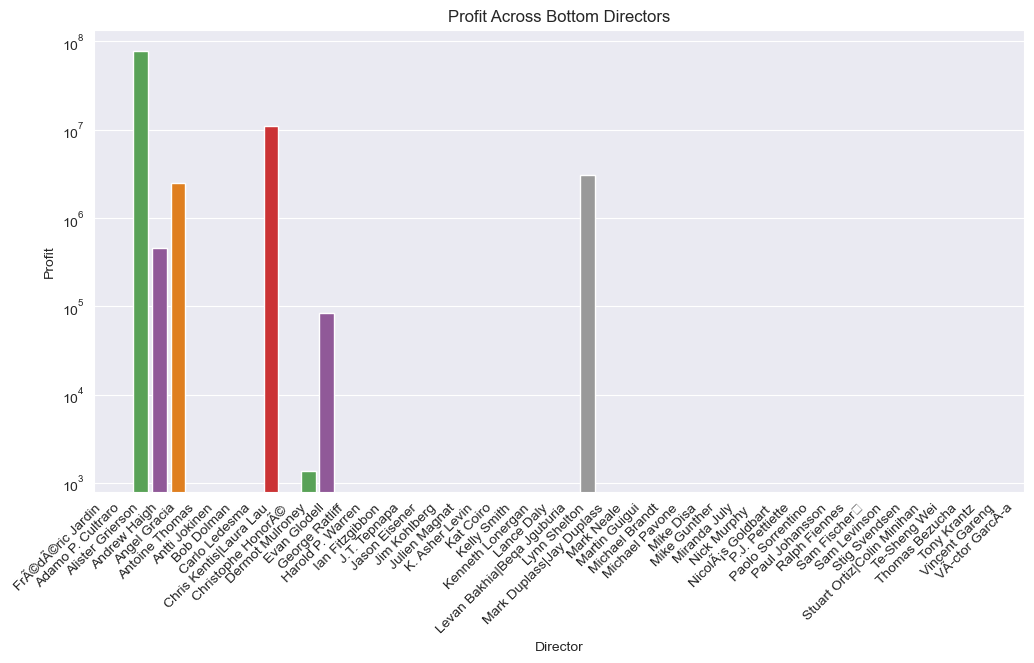

In [31]:
# Analyze how profit varies across directors on the bottom of the list
plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='profit', data=bottom_director_df, palette='Set1')
plt.title('Profit Across Bottom Directors')
plt.xlabel('Director')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

C:\Users\wenbi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


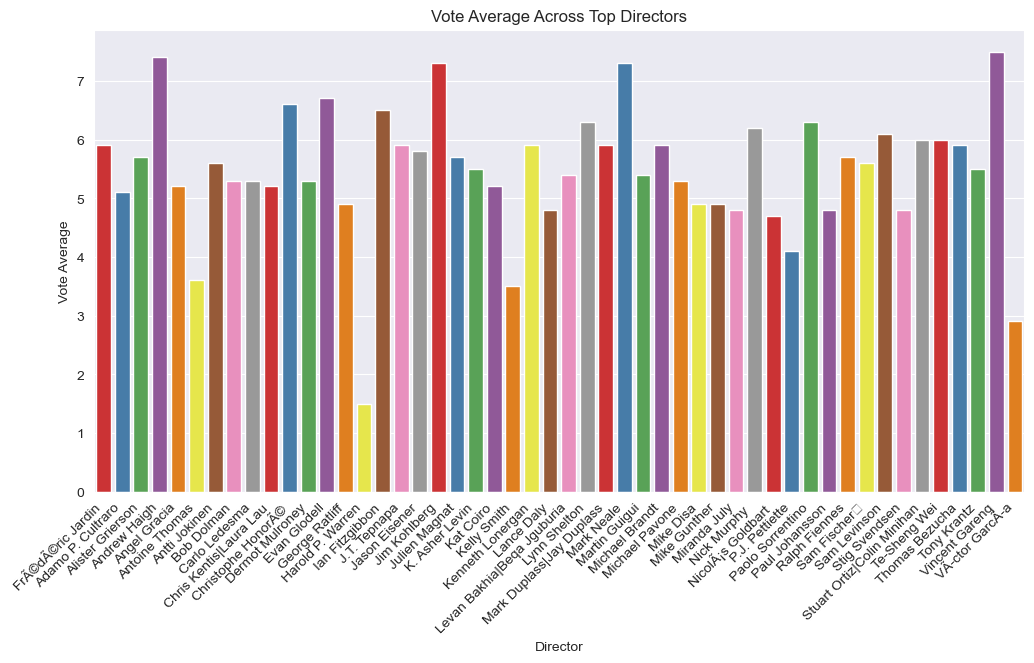

In [32]:
# Analyze how vote average varies across directors on top of the list
average_vote_by_director = bottom_director_df.groupby('director')['vote_average'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='vote_average', data=average_vote_by_director, palette='Set1')
plt.title('Vote Average Across Top Directors')
plt.xlabel('Director')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.show()


### Visualizing effects our Production companies play in the dataset

In [33]:


tmdb_movies['production_companies'] = tmdb_movies['production_companies'].str.split('|')
# Explode the lists to create multiple rows for each movie-genre pair
production_counts =  tmdb_movies['production_companies'].explode().value_counts()
# Get unique genres
top_production = production_counts[0:25]
bottom_production = director_counts[-25:]

In [34]:
top_production_df = tmdb_movies.explode('production_companies')
top_production_df = top_production_df[top_production_df['production_companies'].isin(production_counts.index.to_numpy()[0:25])]
top_production_df = top_production_df.sort_values(by="production_companies")

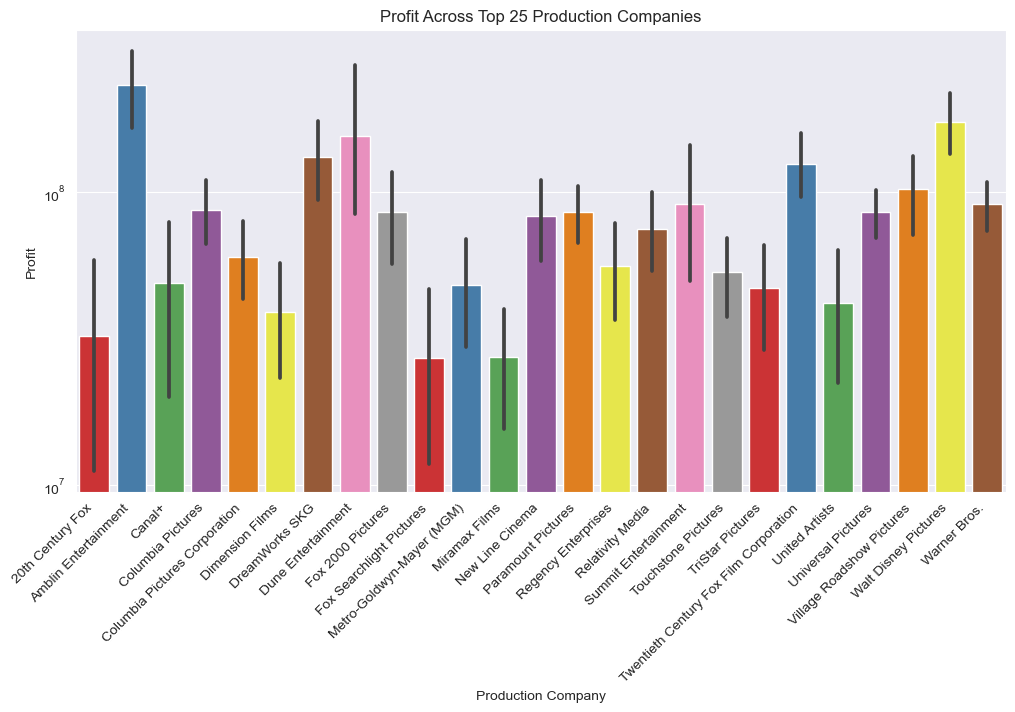

In [35]:
# Analyze how revenue varies across top 25 production companies
plt.figure(figsize=(12, 6))
sns.barplot(x='production_companies', y='profit', data=top_production_df, palette='Set1')
plt.title('Profit Across Top 25 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

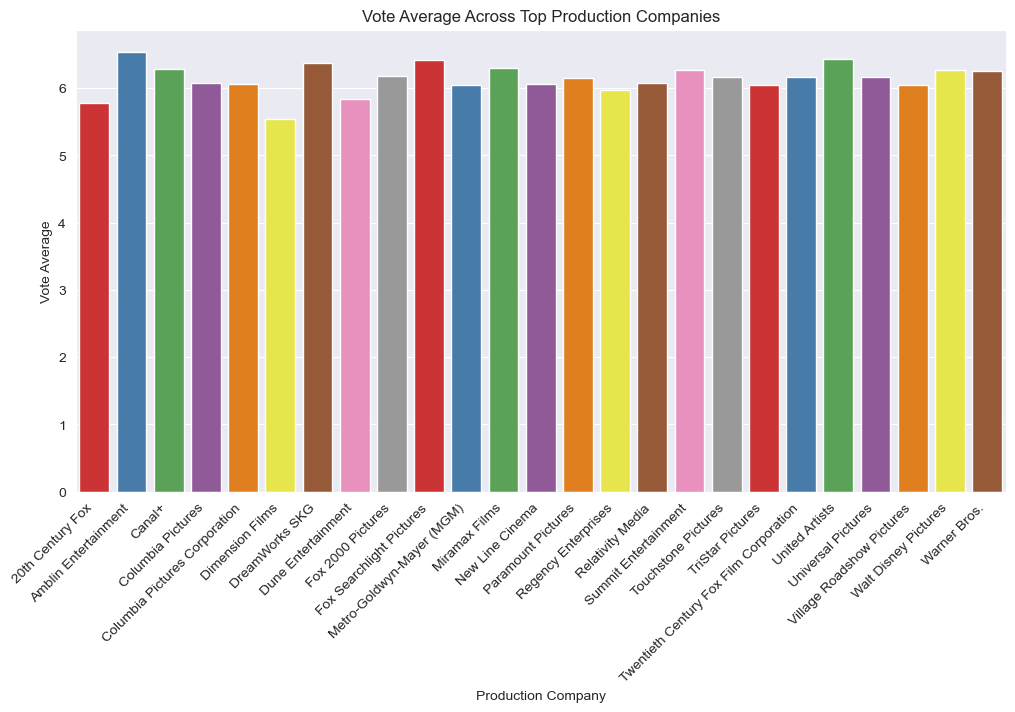

In [36]:
# Analyze how vote average varies across directors on top of the list
average_vote_by_production = top_production_df.groupby('production_companies')['vote_average'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='production_companies', y='vote_average', data=average_vote_by_production, palette='Set1')
plt.title('Vote Average Across Top Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
bottom_production_df = tmdb_movies.explode('production_companies')
bottom_production_df = bottom_production_df[bottom_production_df['production_companies'].isin(production_counts.index.to_numpy()[-25:])]
bottom_production_df = bottom_production_df.sort_values(by="production_companies")

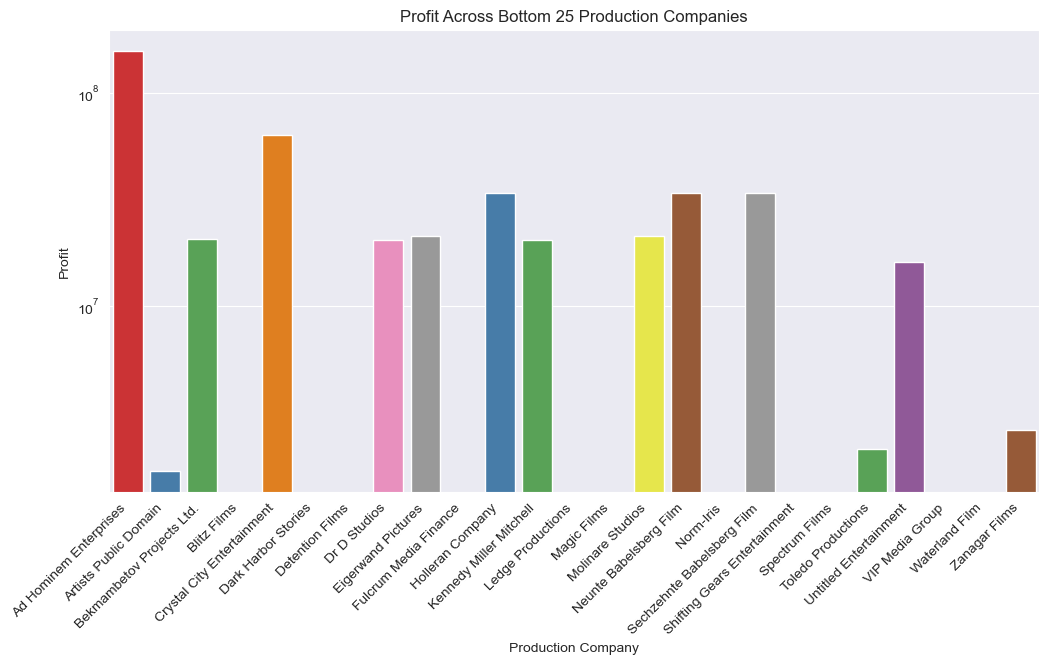

In [38]:
# Analyze how revenue varies across top 25 production companies
plt.figure(figsize=(12, 6))
sns.barplot(x='production_companies', y='profit', data=bottom_production_df, palette='Set1')
plt.title('Profit Across Bottom 25 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale for better visualization if revenue values vary widely
plt.show()

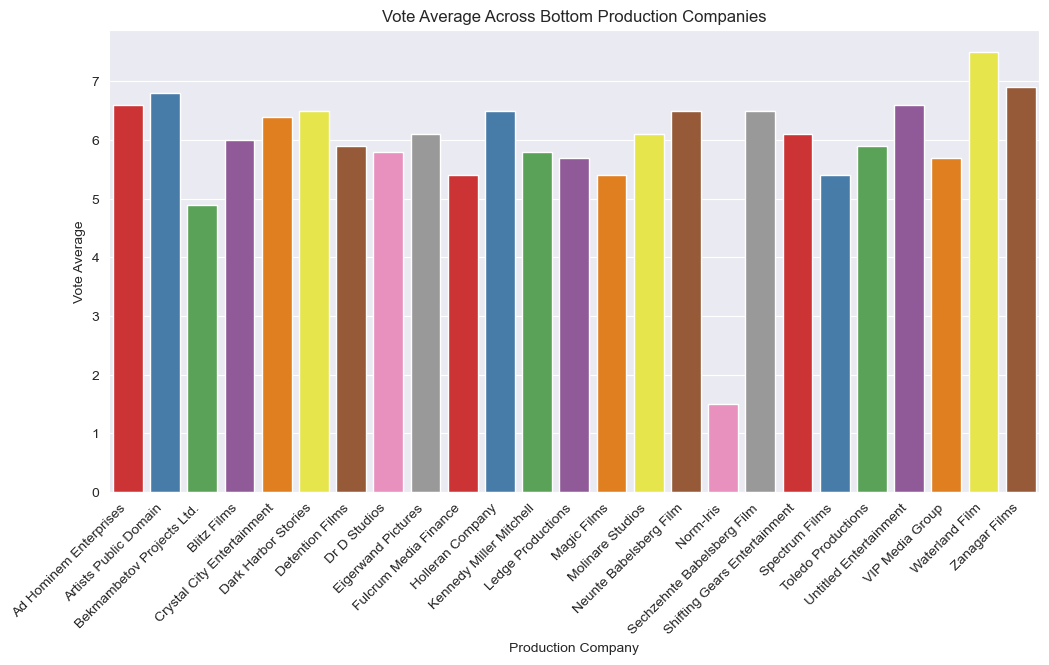

In [39]:
# Analyze how vote average varies across directors on top of the list
average_vote_by_production = bottom_production_df.groupby('production_companies')['vote_average'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='production_companies', y='vote_average', data=average_vote_by_production, palette='Set1')
plt.title('Vote Average Across Bottom Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.show()

## More visualization for Causal Inference

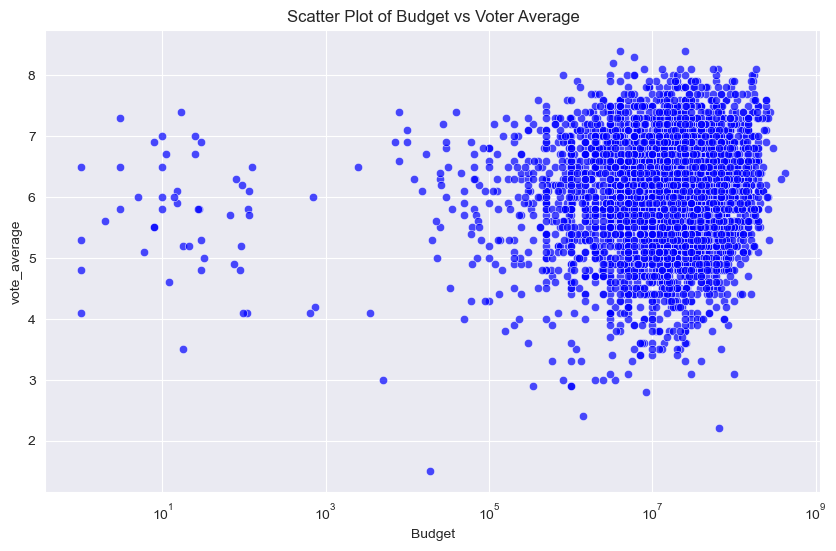

In [40]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='vote_average', data=tmdb_movies, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot of Budget vs Voter Average')
plt.xlabel('Budget')
plt.xscale('log')

# Display the plot
plt.show()

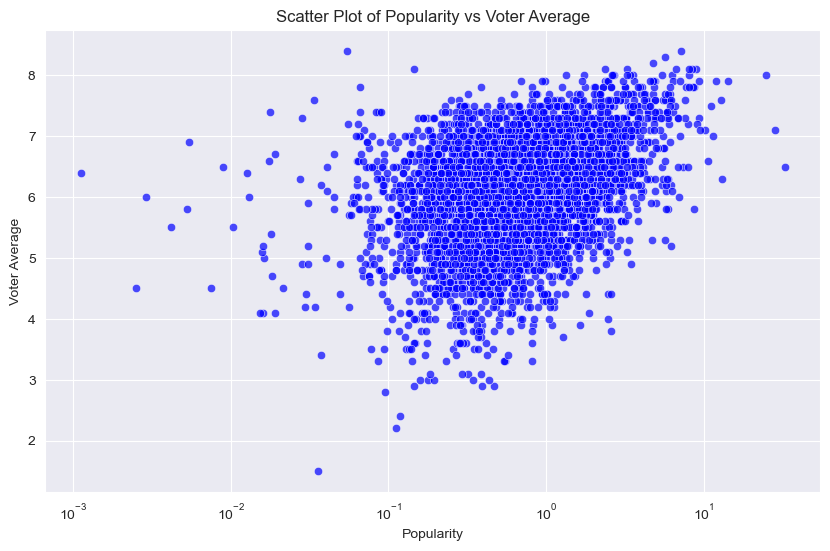

In [41]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=tmdb_movies, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot of Popularity vs Voter Average')
plt.xlabel('Popularity')
plt.ylabel('Voter Average')
plt.xscale('log')

# Display the plot
plt.show()

In [42]:
over_a_mill = tmdb_movies[tmdb_movies["budget"] >= 1000000]
over_a_mill.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor_sum,profit,adj_profit
count,4613.000000,4.613000e+03,4.613000e+03,4613.000000,4613.000000,4613.000000,4613.000000,4.613000e+03,4.613000e+03,4613.000000,4.613000e+03,4.613000e+03
mean,1.064983,3.397920e+07,8.943491e+07,108.427054,449.760026,6.058985,2001.433124,4.078984e+07,1.134423e+08,78.286581,5.545571e+07,7.265245e+07
std,1.384367,3.981082e+07,1.663723e+08,19.214771,824.030148,0.847823,11.343993,4.260743e+07,2.039784e+08,52.864723,1.417071e+08,1.825548e+08
min,0.005266,1.000000e+06,0.000000e+00,0.000000,10.000000,2.200000,1960.000000,9.199996e+05,0.000000e+00,0.000000,-4.139124e+08,-4.139124e+08
25%,0.388680,8.200000e+06,1.477002e+06,95.000000,45.000000,5.500000,1996.000000,1.151448e+07,1.671730e+06,37.000000,-7.077834e+06,-8.814036e+06
50%,0.682409,2.000000e+07,2.920288e+07,105.000000,148.000000,6.100000,2004.000000,2.648001e+07,3.897536e+07,71.000000,7.534961e+06,1.012426e+07
75%,1.235478,4.400000e+07,1.020000e+08,118.000000,464.000000,6.600000,2010.000000,5.519998e+07,1.306618e+08,111.000000,6.223397e+07,8.100428e+07
max,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,661.000000,2.544506e+09,2.750137e+09


In [43]:
over_a_mill = over_a_mill.sort_values(by="budget", ascending=False)

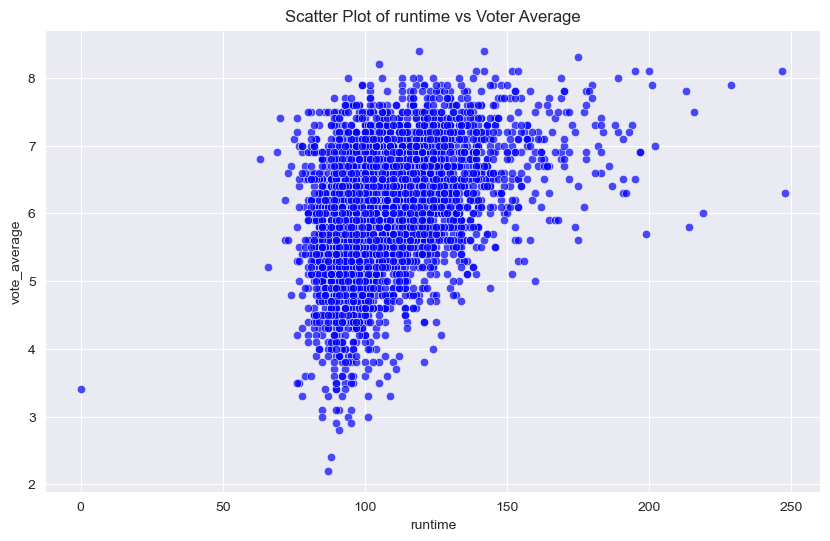

In [44]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='vote_average', data=over_a_mill, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot of runtime vs Voter Average')
plt.xlabel('runtime')

# Display the plot
plt.show()

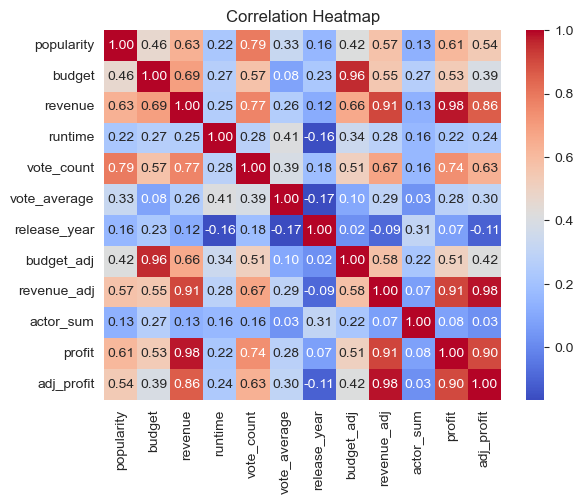

In [45]:
sns.heatmap(over_a_mill.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Causal Inference Research question 2

A budget over 10 million dollars causes higher IMDb ratings?

In [46]:
tmdb_movies.dropna(subset=['cast', 'director', 'genres', 'production_companies'], inplace=True)

In [47]:
tmdb_movies['genre_counts'] = tmdb_movies['genres'].apply(lambda x: len(x))

In [48]:
tmdb_movies["Treatment"] = tmdb_movies['budget'].apply(lambda x: 1 if x > 10000000 else 0)

In [49]:
len(tmdb_movies[tmdb_movies['Treatment'] == 0])

1627

### Quantifying all of our confounders

In [50]:
#Getting the number of movies our directors are in for our dataset prior to movie release year

director_counts = []
for index, row in tmdb_movies.iterrows():
    release_year = row['release_year']
    director = row['director']
    temp = tmdb_movies[(tmdb_movies['director'] == director) & (tmdb_movies['release_year'] <= release_year)]
    director_counts.append(len(temp))

tmdb_movies['director_counts'] = director_counts

In [51]:
#Getting the number of movies our production are in for our dataset prior to movie release year

test = tmdb_movies.copy()
production_df = test.explode("production_companies")

production_counts = []
for index, row in tmdb_movies.iterrows():
    release_year = row['release_year']
    production_company = row['production_companies']
    filtered_df = production_df[(production_df['production_companies'].isin(production_company)) & (production_df['release_year'] <= release_year)]
    production_counts.append(len(filtered_df))

tmdb_movies['production_counts'] = production_counts


In [52]:
test = tmdb_movies.copy()
cast_df = test.explode("cast")
#star_counts_dict = star_counts.to_dict()
#tmdb_movies['star_counts'] = tmdb_movies['cast'].apply(lambda x: sum(star_counts_dict[actor] for actor in x))
cast_counts = []
for index, row in tmdb_movies.iterrows():
    release_year = row['release_year']
    cast = row['cast']
    # Filter the DataFrame based on conditions
    filtered_df = cast_df[(cast_df['cast'].isin(cast)) & (cast_df['release_year'] <= release_year)]

    # Group by 'production_companies' and count the occurrences
    cast_counts.append(len(filtered_df))

tmdb_movies['cast_counts'] = cast_counts

In [53]:
oscar = pd.read_csv('the_oscar_award.csv')
oscar_cast = oscar.copy()
oscar_cast = oscar_cast[(oscar_cast['category'] == 'ACTOR') | (oscar_cast['category'] == 'ACTRESS')]
#oscar_names = set(oscar['name'])
oscar_cast_counts = []
for index, row in tmdb_movies.iterrows():
    release_year = row['release_year']
    cast = row['cast']
    # Filter the DataFrame based on conditions
    filtered_df = oscar_cast[(oscar_cast['name'].isin(cast)) & (oscar_cast['year_film'] <= release_year)]

    # Group by 'production_companies' and count the occurrences
    oscar_cast_counts.append(len(filtered_df))

tmdb_movies['oscar_cast'] = oscar_cast_counts

In [54]:
oscar_director = oscar.copy()
oscar_director = oscar_director[(oscar_director['category'] == 'DIRECTING')]
oscar_director_counts = []
for index, row in tmdb_movies.iterrows():
    release_year = row['release_year']
    director = row['director']
    # Filter the DataFrame based on conditions
    filtered_df = oscar_director[(oscar_director['name'] == director) & (oscar_director['year_film'] <= release_year)]

    # Group by 'production_companies' and count the occurrences
    oscar_director_counts.append(len(filtered_df))

tmdb_movies['oscar_director'] = oscar_director_counts

## Visualizing the effects of our confounders on budget and voter average

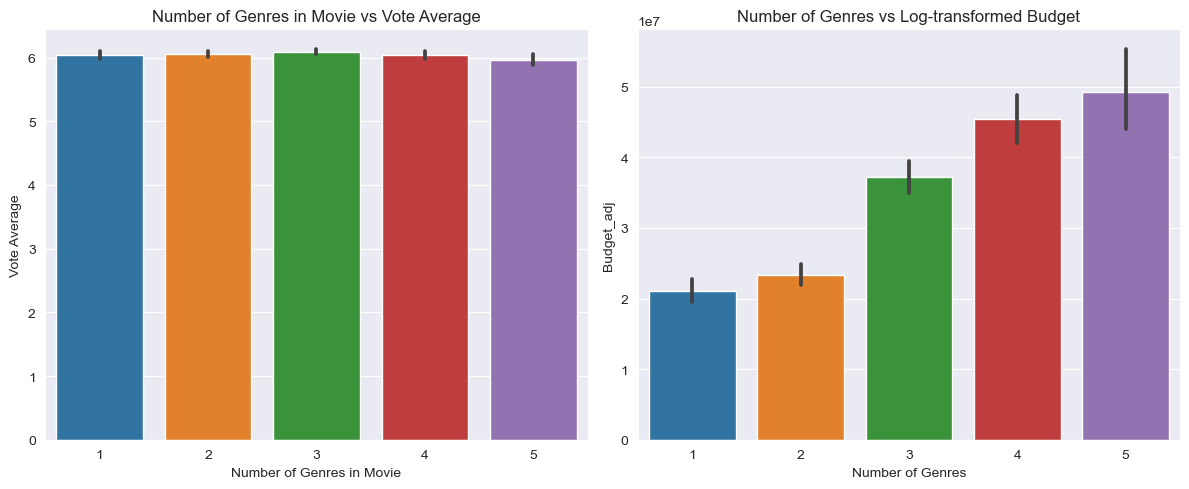

In [55]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Number of Oscar Directors vs Vote Average
sns.barplot(x='genre_counts', y='vote_average', data=tmdb_movies, ax=axs[0])
axs[0].set_title('Number of Genres in Movie vs Vote Average')
axs[0].set_xlabel('Number of Genres in Movie')
axs[0].set_ylabel('Vote Average')

# Second plot: Number of Oscar Directors vs Log-transformed Budget
sns.barplot(x='genre_counts', y='budget', data=tmdb_movies, ax=axs[1])
axs[1].set_title('Number of Genres vs Log-transformed Budget')
axs[1].set_xlabel('Number of Genres')
axs[1].set_ylabel('Budget_adj')


plt.tight_layout()
plt.show()

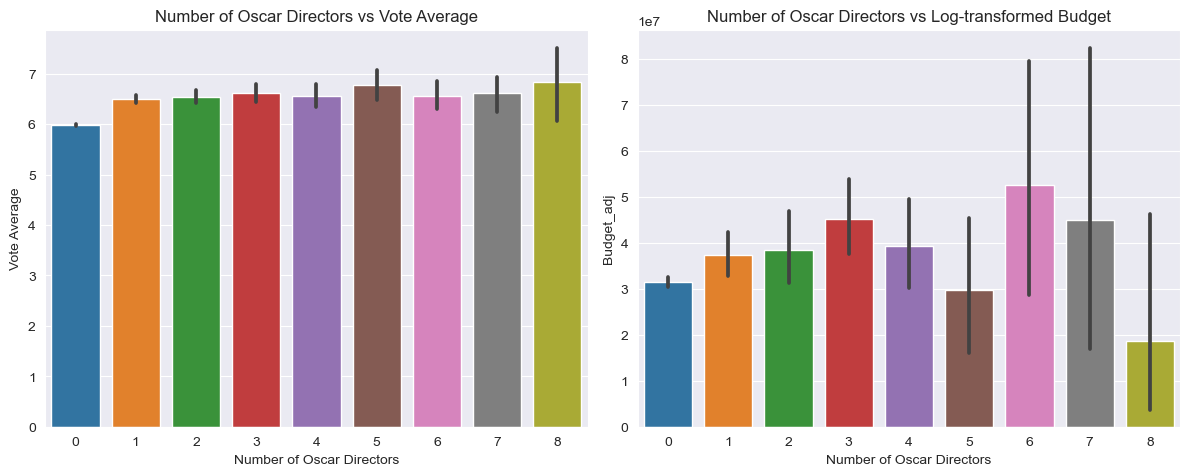

In [56]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Number of Oscar Directors vs Vote Average
sns.barplot(x='oscar_director', y='vote_average', data=tmdb_movies, ax=axs[0])
axs[0].set_title('Number of Oscar Directors vs Vote Average')
axs[0].set_xlabel('Number of Oscar Directors')
axs[0].set_ylabel('Vote Average')

# Second plot: Number of Oscar Directors vs Log-transformed Budget
sns.barplot(x='oscar_director', y='budget', data=tmdb_movies, ax=axs[1])
axs[1].set_title('Number of Oscar Directors vs Log-transformed Budget')
axs[1].set_xlabel('Number of Oscar Directors')
axs[1].set_ylabel('Budget_adj')


plt.tight_layout()
plt.show()

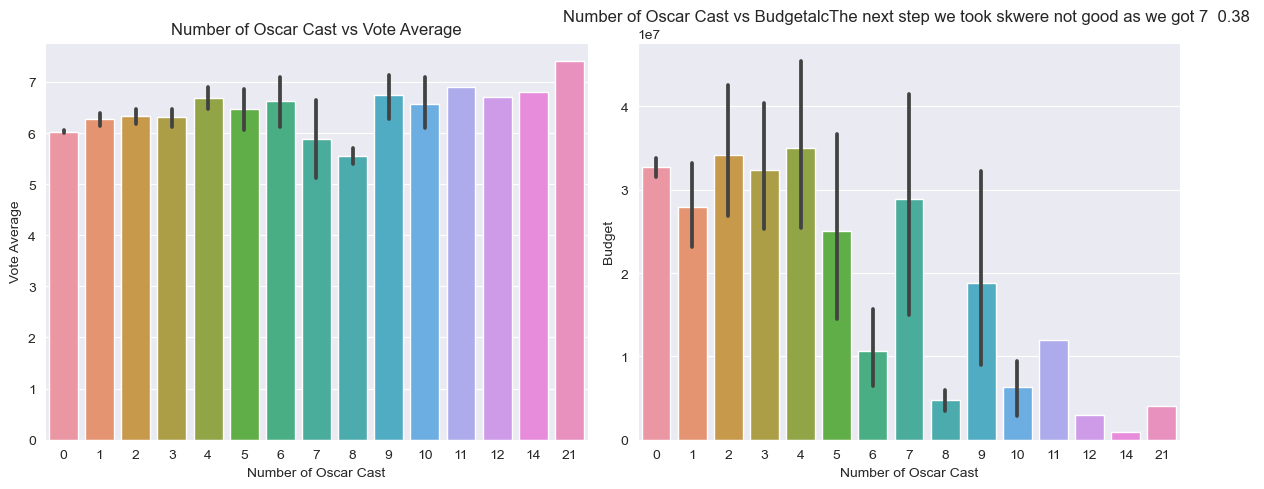

In [57]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Number of Oscar Directors vs Vote Average
sns.barplot(x='oscar_cast', y='vote_average', data=tmdb_movies, ax=axs[0])
axs[0].set_title('Number of Oscar Cast vs Vote Average')
axs[0].set_xlabel('Number of Oscar Cast')
axs[0].set_ylabel('Vote Average')

# Second plot: Number of Oscar Directors vs Log-transformed Budget
sns.barplot(x='oscar_cast', y='budget', data=tmdb_movies, ax=axs[1])
axs[1].set_title('Number of Oscar Cast vs BudgetalcThe next step we took skwere not good as we got 7  0.38 ')
axs[1].set_xlabel('Number of Oscar Cast')
axs[1].set_ylabel('Budget')


plt.tight_layout()
plt.show()

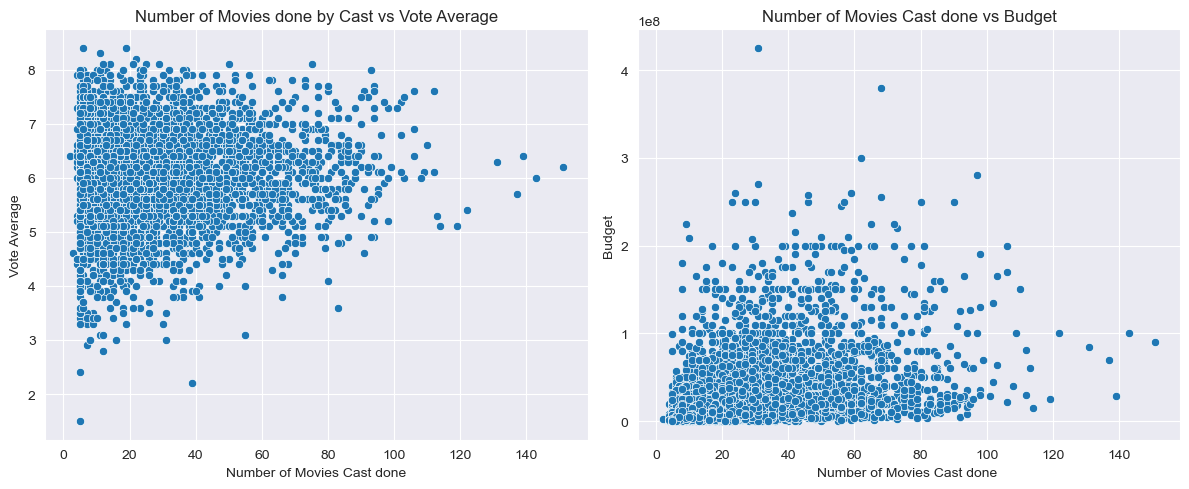

In [58]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Number of Oscar Directors vs Vote Average
sns.scatterplot(x='cast_counts', y='vote_average', data=tmdb_movies, ax=axs[0])
axs[0].set_title('Number of Movies done by Cast vs Vote Average')
axs[0].set_xlabel('Number of Movies Cast done')
axs[0].set_ylabel('Vote Average')

# Second plot: Number of Oscar Directors vs Log-transformed Budget
sns.scatterplot(x='cast_counts', y='budget', data=tmdb_movies, ax=axs[1])
axs[1].set_title('Number of Movies Cast done vs Budget' )
axs[1].set_xlabel('Number of Movies Cast done ')
axs[1].set_ylabel('Budget')

plt.tight_layout()
plt.show()

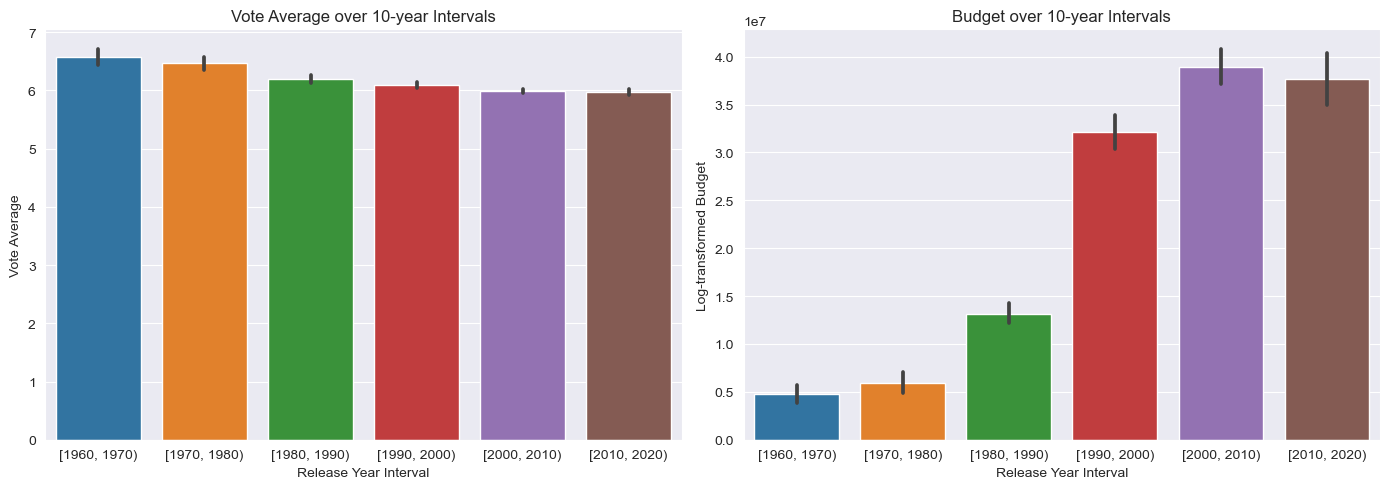

In [59]:
tmdb_movies['year_interval'] = pd.cut(tmdb_movies['release_year'], bins=range(1960, 2021, 10), right=False)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# First plot: Number of Oscar Directors vs Vote Average
sns.barplot(x='year_interval', y='vote_average', data=tmdb_movies, ax=axs[0])
axs[0].set_title('Vote Average over 10-year Intervals')
axs[0].set_xlabel('Release Year Interval')
axs[0].set_ylabel('Vote Average')

# Second plot: Number of Oscar Directors vs Log-transformed Budget
sns.barplot(x='year_interval', y='budget', data=tmdb_movies, ax=axs[1])
axs[1].set_title('Budget over 10-year Intervals')
axs[1].set_xlabel('Release Year Interval')
axs[1].set_ylabel('Log-transformed Budget')

plt.tight_layout()

# Show the plots
plt.show()

## Calculating SDO

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Causal_Df = tmdb_movies[['Treatment', 'genre_counts', 'director_counts', 'production_counts', 'vote_average', 'release_year', 'actor_sum','oscar_cast', 'oscar_director']]
Causal_Df

,Treatment,genre_counts,director_counts,production_counts,vote_average,release_year,actor_sum,oscar_cast,oscar_director
0,1,4,2,115,6.5,2015,71,0,0
1,1,4,6,84,7.1,2015,91,0,1
2,1,3,5,73,6.3,2015,73,0,0
3,1,4,5,26,7.5,2015,57,0,0
4,1,3,7,417,7.3,2015,140,0,0
...,...,...,...,...,...,...,...,...,...
10835,1,5,2,10,7.0,1966,51,1,2
10841,0,1,1,1,5.5,1966,35,0,0
10848,0,2,1,7,6.7,1966,72,0,0
10855,0,4,1,6,6.1,1966,6,0,0


In [61]:
sdo = tmdb_movies.loc[tmdb_movies['Treatment'] == 1, 'vote_average'].mean() - tmdb_movies.loc[tmdb_movies['Treatment'] == 0, 'vote_average'].mean()

sdo

0.08118633245683338

## Calculating p_scores and IPW

In [62]:
X = Causal_Df.drop(['Treatment', 'vote_average'], axis=1)
Z = Causal_Df['Treatment']
Y = Causal_Df['vote_average']

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

propensity_model = LogisticRegression(max_iter=200, penalty=None)
propensity_model.fit(X, Z)

propensity_scores = propensity_model.predict_proba(X)[:, 1]

In [63]:
def estimate_treatment_effect(X, Y, Z, propensity):
    n = len(X)
    first = (Z*Y) / propensity
    second = ((1-Z)*Y) / (1 - propensity)
    return (1/n) * np.sum(first - second)

#### Calculating our IPW

In [64]:
estimate_treatment_effect(X,Y,Z, propensity_scores)

-21.760315490158085

In [65]:
Causal_Df["p_scores"] = propensity_scores

C:\Users\wenbi\AppData\Local\Temp\ipykernel_7892\275257771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Causal_Df["p_scores"] = propensity_scores


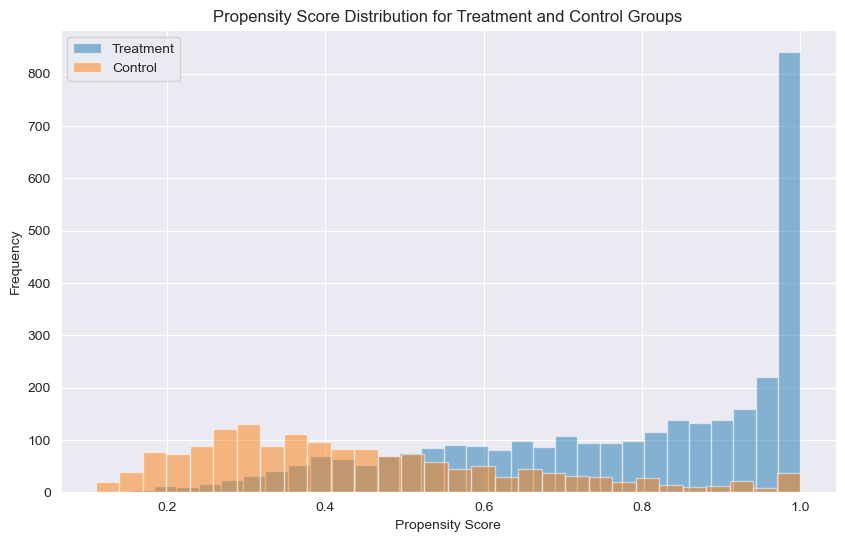

In [66]:
propensity_scores_treatment = Causal_Df[Causal_Df['Treatment'] == 1]['p_scores']
propensity_scores_control = Causal_Df[Causal_Df['Treatment'] == 0]['p_scores']

plt.figure(figsize=(10, 6))
plt.hist(propensity_scores_treatment, bins=30, label='Treatment', alpha=0.5)
plt.hist(propensity_scores_control, bins=30, label='Control', alpha=0.5)
plt.title('Propensity Score Distribution for Treatment and Control Groups')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Trimming our p_scores to those with only range 0.1 < x < 0.9

In [67]:

new_Df = Causal_Df[(Causal_Df["p_scores"] >= 0.1) & (Causal_Df["p_scores"] <= 0.9)]
trimmed_p = new_Df["p_scores"]

X_trimmed = new_Df.drop(['Treatment', 'vote_average', 'p_scores'], axis=1)
Z_trimmed = new_Df['Treatment']
Y_trimmed = new_Df['vote_average']

sc = StandardScaler()
X_trimmed = pd.DataFrame(sc.fit_transform(X_trimmed), columns=X_trimmed.columns)


#### IPW for trimmed p_scores

In [68]:
estimate_treatment_effect(X_trimmed,Y_trimmed,Z_trimmed, trimmed_p)

0.38112124112297663

## Ft OLS from Lab 8 and 9

In [69]:

import statsmodels.api as sm
#import numpy as np
import itertools

In [70]:
# No TODOs here: Just examine the code
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.

    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """

    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)

    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error

    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

In [71]:
full_linear_model = fit_OLS_model(Causal_Df, 'vote_average', ['genre_counts', 'director_counts', 'production_counts', 'actor_sum', 'release_year', 'oscar_cast', 'oscar_director'])
print(full_linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           vote_average   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          3.646e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        22:28:44   Log-Likelihood:                         -5953.1
No. Observations:                4819   AIC:                                  1.192e+04
Df Residuals:                    4812   BIC:                                  1.197e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Matching method 1 Caliper

In [83]:
#Caliper matching

matches = []
caliper_width = 0.1

trimmed_causal = Causal_Df[(Causal_Df['p_scores'] <= 0.9) & (Causal_Df['p_scores'] >= 0.1)]

treated_df = trimmed_causal[trimmed_causal["Treatment"] == 1]
control_df = trimmed_causal[trimmed_causal["Treatment"] == 0]

for index, treated_row in treated_df.iterrows():
    treated_score = treated_row['p_scores']
    potential_matches = control_df[
        (control_df['p_scores'] >= treated_score - caliper_width) &
        (control_df['p_scores'] <= treated_score + caliper_width)
        ]

    if not potential_matches.empty:
        distance = np.abs(potential_matches['p_scores'] - treated_score)
        closest_match_index = distance.idxmin()
        matches.append((index, closest_match_index))


matched_pairs_df = pd.DataFrame(matches, columns=['treated_index', 'control_index'])
matched_df = pd.merge(treated_df, matched_pairs_df, left_index=True, right_on='treated_index', how='outer')
matched_df = pd.merge(matched_df, control_df, left_on='control_index', right_index=True, suffixes=('_treated', '_control'))


matched_df

,Treatment_treated,genre_counts_treated,director_counts_treated,production_counts_treated,vote_average_treated,release_year_treated,actor_sum_treated,oscar_cast_treated,oscar_director_treated,p_scores_treated,...,Treatment_control,genre_counts_control,director_counts_control,production_counts_control,vote_average_control,release_year_control,actor_sum_control,oscar_cast_control,oscar_director_control,p_scores_control
0,1,4,5,26,7.5,2015,57,0,0,0.810888,...,0,3,5,19,6.1,2011,113,0,0,0.811304
355,1,3,4,67,3.8,1999,49,0,0,0.810872,...,0,3,5,19,6.1,2011,113,0,0,0.811304
358,1,3,9,25,7.4,2001,29,0,3,0.810978,...,0,3,5,19,6.1,2011,113,0,0,0.811304
709,1,2,1,71,6.9,2012,133,0,0,0.811545,...,0,3,5,19,6.1,2011,113,0,0,0.811304
745,1,5,1,40,5.2,2012,89,1,0,0.811341,...,0,3,5,19,6.1,2011,113,0,0,0.811304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1,2,1,1,5.7,1965,62,1,5,0.202643,...,0,1,1,1,5.8,2012,19,0,0,0.202429
1892,1,2,1,29,5.5,1978,17,0,0,0.290994,...,0,2,1,1,5.9,1977,71,2,0,0.290430
1897,1,1,2,25,5.9,1978,14,0,0,0.248437,...,0,2,1,2,4.2,2013,8,0,0,0.248513
1898,1,1,3,7,5.8,1966,18,1,4,0.184488,...,0,2,1,5,7.5,1978,10,0,1,0.184485


In [84]:
matched_df.describe()

,Treatment_treated,genre_counts_treated,director_counts_treated,production_counts_treated,vote_average_treated,release_year_treated,actor_sum_treated,oscar_cast_treated,oscar_director_treated,p_scores_treated,...,Treatment_control,genre_counts_control,director_counts_control,production_counts_control,vote_average_control,release_year_control,actor_sum_control,oscar_cast_control,oscar_director_control,p_scores_control
count,1900.0,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,...,1900.0,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,1.0,2.667368,2.422105,38.148421,6.066684,2000.644211,74.464737,0.267895,0.196316,0.637941,...,0.0,2.692632,2.777368,30.586842,5.996211,2001.070000,80.587895,0.256842,0.183158,0.637907
std,0.0,1.113793,1.886103,33.664595,0.837296,10.127140,47.120288,0.998852,0.675991,0.180074,...,0.0,1.089105,2.527868,33.582565,0.905618,12.325959,50.200684,0.861273,0.699906,0.180019
min,1.0,1.000000,1.000000,1.000000,2.200000,1960.000000,0.000000,0.000000,0.000000,0.155234,...,0.0,1.000000,1.000000,1.000000,2.400000,1961.000000,0.000000,0.000000,0.000000,0.156227
25%,1.0,2.000000,1.000000,10.000000,5.500000,1994.000000,38.000000,0.000000,0.000000,0.505959,...,0.0,2.000000,1.000000,5.000000,5.500000,1993.000000,46.000000,0.000000,0.000000,0.506217
50%,1.0,3.000000,2.000000,29.000000,6.100000,2002.000000,68.000000,0.000000,0.000000,0.655659,...,0.0,3.000000,2.000000,17.000000,6.100000,2006.000000,75.000000,0.000000,0.000000,0.655628
75%,1.0,3.000000,3.000000,59.000000,6.600000,2009.000000,104.000000,0.000000,0.000000,0.797688,...,0.0,3.000000,4.000000,45.000000,6.600000,2011.000000,113.000000,0.000000,0.000000,0.797608
max,1.0,5.000000,14.000000,162.000000,8.400000,2015.000000,265.000000,11.000000,6.000000,0.899680,...,0.0,5.000000,12.000000,149.000000,8.200000,2015.000000,280.000000,7.000000,8.000000,0.895653


## Calculating the ATE using the matched groups.

In [85]:
matched_ATE = matched_df['vote_average_treated'].mean() - matched_df['vote_average_control'].mean()
matched_ATE

0.07047368421052624

## Perform more analysis on how good our matching was

In [86]:
mae_genre = np.abs(matched_df['genre_counts_treated'].mean() - matched_df['genre_counts_control'].mean())
smd_genre = (matched_df['genre_counts_treated'].mean() - matched_df['genre_counts_control'].mean()) / np.sqrt((matched_df['genre_counts_treated'].std() ** 2 + matched_df['genre_counts_control'].std() ** 2) / 2)

mae_director = np.abs(matched_df['director_counts_treated'].mean() - matched_df['director_counts_control'].mean())
smd_director = (matched_df['director_counts_treated'].mean() - matched_df['director_counts_control'].mean()) / np.sqrt((matched_df['director_counts_treated'].std() ** 2 + matched_df['director_counts_control'].std() ** 2) / 2)

mae_production = np.abs(matched_df['production_counts_treated'].mean() - matched_df['production_counts_control'].mean())
smd_production = (matched_df['production_counts_treated'].mean() - matched_df['production_counts_control'].mean()) / np.sqrt((matched_df['production_counts_treated'].std() ** 2 + matched_df['production_counts_control'].std() ** 2) / 2)

actor_mae = np.abs(matched_df['actor_sum_treated'].mean() - matched_df['actor_sum_control'].mean())
smd_actor = (matched_df['actor_sum_treated'].mean() - matched_df['actor_sum_control'].mean()) / np.sqrt((matched_df['actor_sum_treated'].std() ** 2 + matched_df['actor_sum_control'].std() ** 2) / 2)

oscar_cast_mae = np.abs(matched_df['oscar_cast_treated'].mean() - matched_df['oscar_cast_control'].mean())
smd_oscar_cast = (matched_df['oscar_cast_treated'].mean() - matched_df['oscar_cast_control'].mean()) / np.sqrt((matched_df['oscar_cast_treated'].std() ** 2 + matched_df['oscar_cast_control'].std() ** 2) / 2)

oscar_director_mae = np.abs(matched_df['oscar_director_treated'].mean() - matched_df['oscar_director_control'].mean())
smd_oscar_director = (matched_df['oscar_director_treated'].mean() - matched_df['oscar_director_control'].mean()) / np.sqrt((matched_df['oscar_director_treated'].std() ** 2 + matched_df['oscar_director_control'].std() ** 2) / 2)

print(f"""
Genre_count MAE: {mae_genre}
Genre_count SMD: {smd_genre}

Director_count MAE: {mae_director}
Director_count SMD: {smd_director}

Production_count MAE: {mae_production}
Production_count SMD: {smd_production}

actor_count MAE: {actor_mae}
Production_count SMD: {smd_actor}

oscar_cast MAE: {oscar_cast_mae}
oscar_cast SMD: {smd_oscar_cast}

oscar_cast MAE: {oscar_director_mae}
oscar_cast SMD: {smd_oscar_director}

""")


Genre_count MAE: 0.025263157894736654
Genre_count SMD: -0.022934854258378014

Director_count MAE: 0.3552631578947367
Director_count SMD: -0.15929723686489905

Production_count MAE: 7.561578947368417
Production_count SMD: 0.22488900074624735

actor_count MAE: 6.123157894736835
Production_count SMD: -0.1257713081379254

oscar_cast MAE: 0.01105263157894737
oscar_cast SMD: 0.011851381878690432

oscar_cast MAE: 0.013157894736842118
oscar_cast SMD: 0.019123385746621716


In [87]:
np.abs(matched_df['p_scores_treated'] - matched_df['p_scores_control'])

0       0.000417
355     0.000433
358     0.000327
709     0.000241
745     0.000037
          ...   
1890    0.000214
1892    0.000564
1897    0.000075
1898    0.000003
1899    0.000044
Length: 1900, dtype: float64

# Matching method #2 kNN Matching

In [88]:
from sklearn.neighbors import NearestNeighbors

In [89]:
Causal_Df[Causal_Df['Treatment'] == 1]

,Treatment,genre_counts,director_counts,production_counts,vote_average,release_year,actor_sum,oscar_cast,oscar_director,p_scores
0,1,4,2,115,6.5,2015,71,0,0,0.937292
1,1,4,6,84,7.1,2015,91,0,1,0.958463
2,1,3,5,73,6.3,2015,73,0,0,0.902331
3,1,4,5,26,7.5,2015,57,0,0,0.810888
4,1,3,7,417,7.3,2015,140,0,0,0.999966
...,...,...,...,...,...,...,...,...,...,...
10779,1,3,9,3,6.2,1978,46,2,0,0.749055
10788,1,5,4,30,6.1,1978,3,1,3,0.645339
10800,1,1,2,25,5.9,1978,14,0,0,0.248437
10824,1,1,3,7,5.8,1966,18,1,4,0.184488


In [90]:

# Use Nearest Neighbors to find matches for each treated unit
def knn_matching(treated, control, k=1):
    knn_model = NearestNeighbors(n_neighbors=k)
    knn_model.fit(control[['p_scores']])
    distances, indices = knn_model.kneighbors(treated[['p_scores']])
    matched_indices = indices.flatten()
    matched_treated_units = treated.index[indices.flatten()]

    matched_data = control.iloc[matched_indices].copy()
    matched_data['MatchedTreatedUnit'] = matched_treated_units
    return matched_data

neighbor_matching = Causal_Df[(Causal_Df['p_scores'] <= 0.9) & (Causal_Df['p_scores'] >= 0.1)]

Treatment_df = neighbor_matching[neighbor_matching['Treatment'] == 1]
Control_df = neighbor_matching[neighbor_matching['Treatment'] == 0]

matched_kNN = knn_matching(Treatment_df, Control_df)
matched_kNN = pd.merge(Treatment_df, matched_kNN, left_index=True, right_on='MatchedTreatedUnit', suffixes=('_treated', '_control'))
matched_kNN

,Treatment_treated,genre_counts_treated,director_counts_treated,production_counts_treated,vote_average_treated,release_year_treated,actor_sum_treated,oscar_cast_treated,oscar_director_treated,p_scores_treated,...,genre_counts_control,director_counts_control,production_counts_control,vote_average_control,release_year_control,actor_sum_control,oscar_cast_control,oscar_director_control,p_scores_control,MatchedTreatedUnit
45,1,3,1,143,8.0,2015,10,0,0,0.893879,...,3,1,7,5.9,2015,96,0,0,0.546198,9
45,1,3,1,143,8.0,2015,10,0,0,0.893879,...,3,1,7,5.9,2015,96,0,0,0.546198,9
49,1,2,1,36,7.6,2015,82,0,0,0.575637,...,5,1,10,6.6,2015,109,0,0,0.739109,12
79,1,3,5,12,7.0,2015,105,0,0,0.783923,...,3,5,9,4.8,2015,80,0,0,0.729468,17
87,1,2,1,42,5.3,2015,36,0,0,0.498107,...,1,1,64,5.1,2015,90,0,0,0.648351,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,1,3,1,3,6.6,1982,56,0,0,0.339438,...,2,6,1,4.9,1978,70,2,8,0.477775,8893
10810,1,1,2,26,6.5,1982,47,0,0,0.325703,...,3,1,1,4.3,1978,2,0,0,0.220367,8894
10815,1,1,2,33,6.8,1982,22,0,0,0.305404,...,3,2,20,5.8,1978,62,3,1,0.493739,8895
10815,1,1,2,33,6.8,1982,22,0,0,0.305404,...,3,2,20,5.8,1978,62,3,1,0.493739,8895


## ATE for kNN

In [91]:
matched_ATE = matched_kNN['vote_average_treated'].mean() - matched_kNN['vote_average_control'].mean()
matched_ATE

0.07068421052631635

In [92]:
mae_genre = np.abs(matched_kNN['genre_counts_treated'].mean() - matched_kNN['genre_counts_control'].mean())
smd_genre = (matched_kNN['genre_counts_treated'].mean() - matched_kNN['genre_counts_control'].mean()) / np.sqrt((matched_kNN['genre_counts_treated'].std() ** 2 + matched_kNN['genre_counts_control'].std() ** 2) / 2)

mae_director = np.abs(matched_kNN['director_counts_treated'].mean() - matched_kNN['director_counts_control'].mean())
smd_director = (matched_kNN['director_counts_treated'].mean() - matched_kNN['director_counts_control'].mean()) / np.sqrt((matched_kNN['director_counts_treated'].std() ** 2 + matched_kNN['director_counts_control'].std() ** 2) / 2)

mae_production = np.abs(matched_kNN['production_counts_treated'].mean() - matched_kNN['production_counts_control'].mean())
smd_production = (matched_kNN['production_counts_treated'].mean() - matched_kNN['production_counts_control'].mean()) / np.sqrt((matched_kNN['production_counts_treated'].std() ** 2 + matched_kNN['production_counts_control'].std() ** 2) / 2)

actor_mae = np.abs(matched_kNN['actor_sum_treated'].mean() - matched_kNN['actor_sum_control'].mean())
smd_actor = (matched_kNN['actor_sum_treated'].mean() - matched_kNN['actor_sum_control'].mean()) / np.sqrt((matched_kNN['actor_sum_treated'].std() ** 2 + matched_kNN['actor_sum_control'].std() ** 2) / 2)

oscar_cast_mae = np.abs(matched_kNN['oscar_cast_treated'].mean() - matched_kNN['oscar_cast_control'].mean())
smd_oscar_cast = (matched_kNN['oscar_cast_treated'].mean() - matched_kNN['oscar_cast_control'].mean()) / np.sqrt((matched_kNN['oscar_cast_treated'].std() ** 2 + matched_df['oscar_cast_control'].std() ** 2) / 2)

oscar_director_mae = np.abs(matched_kNN['oscar_director_treated'].mean() - matched_kNN['oscar_director_control'].mean())
smd_oscar_director = (matched_kNN['oscar_director_treated'].mean() - matched_kNN['oscar_director_control'].mean()) / np.sqrt((matched_kNN['oscar_director_treated'].std() ** 2 + matched_kNN['oscar_director_control'].std() ** 2) / 2)

print(f"""
Genre_count MAE: {mae_genre}
Genre_count SMD: {smd_genre}

Director_count MAE: {mae_director}
Director_count SMD: {smd_director}

Production_count MAE: {mae_production}
Production_count SMD: {smd_production}

actor_count MAE: {actor_mae}
Production_count SMD: {smd_actor}

oscar_cast MAE: {oscar_cast_mae}
oscar_cast SMD: {smd_oscar_cast}

oscar_cast MAE: {oscar_director_mae}
oscar_cast SMD: {smd_oscar_director}

""")


Genre_count MAE: 0.004210526315789664
Genre_count SMD: 0.0038925375219053485

Director_count MAE: 0.33052631578947356
Director_count SMD: -0.1508057987428626

Production_count MAE: 9.78473684210526
Production_count SMD: 0.2867989487830919

actor_count MAE: 6.460000000000008
Production_count SMD: 0.12568917077952557

oscar_cast MAE: 0.10736842105263156
oscar_cast SMD: -0.1408101006047226

oscar_cast MAE: 0.07368421052631578
oscar_cast SMD: -0.1274492202643551

